In [208]:
"""
Step 1: Worflow to cluster by colour

- every delivery d must be run after the other

open task :
- only nurn number 1 for the first turn, the rest can be all the same number
"""

'\nStep 1: Worflow to cluster by colour\n\n- every delivery d must be run after the other\n\nopen task :\n- only nurn number 1 for the first turn, the rest can be all the same number\n'

In [209]:
"""
Installing the dependencies
"""

import os
os.environ["OMP_NUM_THREADS"] = "1"

# import necessary library
# kmeans clustering
from sklearn import preprocessing
from sklearn.cluster import KMeans


# yellowbrick visualizers
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.cluster import intercluster_distance
from yellowbrick.contrib.scatter import ScatterVisualizer

# loading and handling data
import pandas as pd
import numpy as np

# for saving and loading k means model
import pickle as pk

# dimensional reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# generic plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
date = 240826
file_path = f"C:\\Users\\david\\OneDrive\\Documents\\01_Architektur\\02_MA Architektur\\TUM\\2024_Sommersemester\\01_THESIS\\02_MA_Thesis\\02_Listing\\01_Visual_Studio\\240816_Simulation\\01_Simulate_Bricks\\{date}_brick-colour_simulation.csv"


# Try reading the file with different encodings, one of them should work...
try:
    bd = pd.read_csv(file_path, sep=",", encoding="utf-8")
    print("utf encoder :")
except UnicodeDecodeError:
    bd = pd.read_csv(file_path, sep=",", encoding="ISO-8859-1")
    print("iso encoder :")


# define delivery number
d = 1

# Select the first turn of delivery
bd_delivery = bd[bd["delivery_nr"] == d]
bd_delivery_turn_1 = bd_delivery[bd_delivery["turn_nr"] == 1]

# create name based on delivery and turn nbr
format = str(bd_delivery_turn_1["brick_format"].iloc[0]) 


turn_nbr = str(bd_delivery_turn_1["turn_nr"].iloc[0])
name = f"{d}-{turn_nbr}"
print(name)


# Select only the RGB data for the process
numeric_brick_data = ["R", "G","B"]

print(bd_delivery_turn_1.head(5))
print(f"bricks in the first turn : {len(bd_delivery_turn_1)}")
print(f"bricks in the whole {d}. delivery : {len(bd_delivery)}")

utf encoder :
1-1
   brick_id  delivery_nr  brick_format brick_original_dimensions (mm)  \
0         1            1  Reichsformat                   250, 120, 65   
1         2            1  Reichsformat                   250, 120, 65   
2         3            1  Reichsformat                   250, 120, 65   
3         4            1  Reichsformat                   250, 120, 65   
4         5            1  Reichsformat                   250, 120, 65   

  brick_origin  brick_distance (km)  age (y) colour name  turn_nr  \
0       Erding                   43       79       beige        1   
1       Erding                   43       79       beige        1   
2       Erding                   43       79       beige        1   
3       Erding                   43       79       beige        1   
4       Erding                   43       79       beige        1   

   mortar rests (%)  colour rests (%)    R    G    B  lu (mm)  wu (mm)  \
0              0.38              0.01  229  203  145  

In [211]:
""" 
TRAIN THE SCALER MODEL
- changes for version afterwards : fit transform fits and transforms in one step, no need to train a model
"""

scaler = preprocessing.StandardScaler().fit(bd_delivery_turn_1[numeric_brick_data])

print(scaler.mean_) # berechnung des Durschnittswertes aller in einer columns augeführten Werte
print(scaler.scale_) 

# save the trained mode model, commented this out after fitting
#pk.dump(scaler, open(f"{name}_scaler_colour.pkl","wb"))

[216.20987654 175.8436214  127.19341564]
[23.72877404 30.38559178 18.2240186 ]


In [212]:
scaler = pk.load(open(f"{name}_scaler_colour.pkl","rb"))

X_scaled_first = scaler.transform(bd_delivery_turn_1[numeric_brick_data])

# display the first 5 rows, control function
X_scaled_first[:1]

array([[0.53901324, 0.89372551, 0.97709428]])

c:\Users\david\anaconda3\envs\sklearn\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\david\anaconda3\envs\sklearn\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

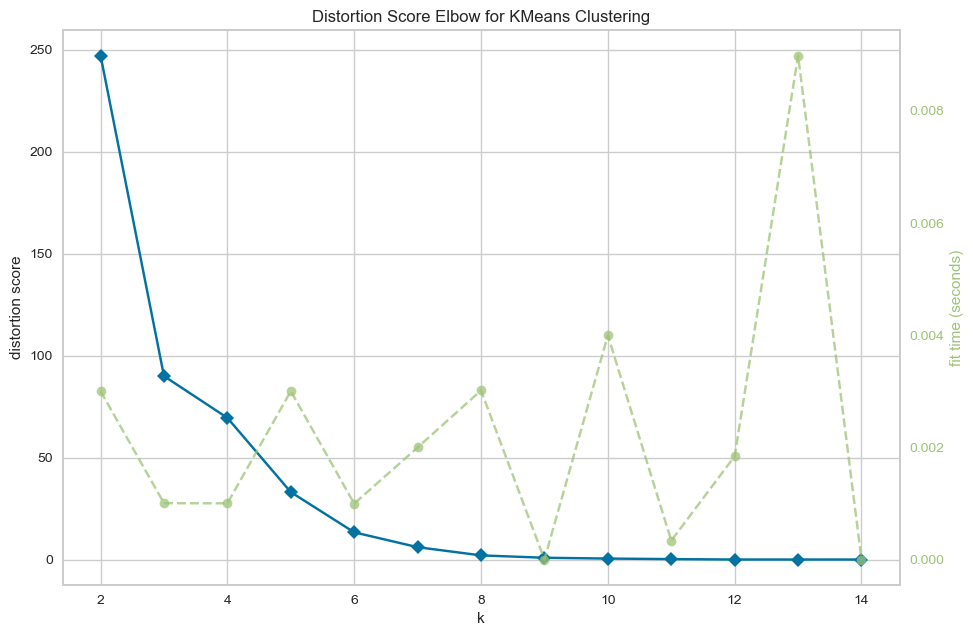

In [213]:
"""
ELBOW PLOT 
first plot, defining the optimal amount of clusters for the data

"""

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k = (2, 15), size = (1080, 720), locate_elbow = False)
visualizer.fit(X_scaled_first)        # Fit the SCALED data to the visualizer
visualizer.show(outpath=f"{date}_{name}_Elbowplot_distortion-score.png")       # Finalize and render the figure, commented out

In [214]:
"""
TRAIN THE KMEANS MODEL

-after reading the graph, deciding for n-clusters as optimal number
-to get as many distinct groups as possible, n around 10
- train the model on the first incoming data
"""

# explore  number of cluster and fit the model
k = 10

# train and save mode model, 
kmeanModel = KMeans(n_clusters=k, random_state=None, n_init="auto")
kmeanModel.fit(X_scaled_first)

# I commented this out after fitting
#pk.dump(kmeanModel, open(f"{name}_kmeanModel_k{k}.pkl","wb"))

KMeans(n_clusters=10)

In [215]:
# load the model
kmeanModel = pk.load(open(f"{name}_kmeanModel_k{k}.pkl","rb"))

cluster_center = kmeanModel.cluster_centers_
cluster_labels = kmeanModel.labels_
cluster_iterations = kmeanModel.n_iter_

print(f"cluster centres : {cluster_center}")
#print(f"cluster labels : {cluster_labels}")
print(f"iterations done : {cluster_iterations}")

cluster centres : [[-0.55670287  0.23551882 -0.6690849 ]
 [ 0.53901324  1.02536685  0.81247636]
 [-2.74813509 -2.00238395 -1.32755657]
 [ 0.28615568 -1.01507391 -0.33984906]
 [ 0.53901324  0.60343948 -0.33984906]
 [-1.44170434 -1.80492194 -1.87628296]
 [ 0.53901324 -0.29104654 -0.61421226]
 [ 0.53901324  0.66270787  1.25038154]
 [ 0.53901324  0.5975325   0.92222164]
 [ 0.53901324  0.89372551  0.97709428]]
iterations done : 2


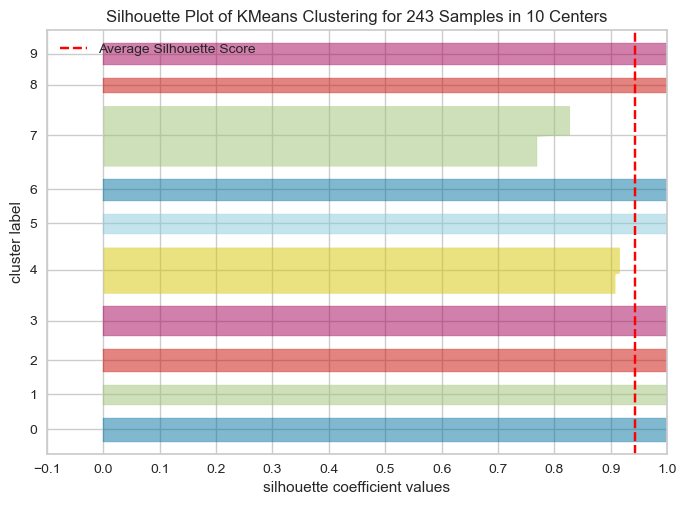

In [216]:
"""
SILHOUETTE PLOT
defining the fitting of the data

"""
visualizer1 = silhouette_visualizer(kmeanModel, X_scaled_first, colors='yellowbrick', is_fitted=True)      # Fit the data to the visualizer
visualizer1.show(outpath = None) 

#plt.savefig(f"{date}_{name}_Silhouette_plot_k{k}.png")
plt.show()

In [217]:
"""
- fit first turn to trained model
- integrate the cluster labels to the data frame
- export the csv with the clustered bricks as a own csv lsit 
"""

clusters = kmeanModel.predict(X_scaled_first)
bd_delivery_turn_1.loc[:, "colour_clusters"] = clusters

#print(clusters[:5])

# save the new cluster column to my csv file
#bd_delivery_turn_1.to_csv(f"{date}_{name}_Brick_colour-cluster_k{k}.csv")

# display the first 5 of the list
bd_delivery_turn_1.head(15)

C:\Users\david\AppData\Local\Temp\ipykernel_14440\92380191.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd_delivery_turn_1.loc[:, "colour_clusters"] = clusters


,brick_id,delivery_nr,brick_format,brick_original_dimensions (mm),brick_origin,brick_distance (km),age (y),colour name,turn_nr,mortar rests (%),colour rests (%),R,G,B,lu (mm),wu (mm),hu (mm),volume (%),colour_clusters
0,1,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,1,0.38,0.01,229,203,145,161.7,125.4,68.0,0.71,9
1,2,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,1,0.36,0.01,229,197,151,246.2,121.4,67.7,1.04,7
2,3,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,1,0.37,0.11,203,183,115,169.9,119.6,65.2,0.68,0
3,4,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,1,0.05,0.01,229,192,121,208.3,120.3,68.2,0.88,4
4,5,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,1,0.10,0.01,151,115,103,256.0,119.2,67.9,1.06,2
5,6,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,1,0.33,0.01,223,145,121,243.7,118.8,63.4,0.94,3
6,7,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,1,0.09,0.01,229,194,144,241.6,117.3,61.8,0.90,8
7,8,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,1,0.16,0.01,229,192,121,260.8,122.9,65.4,1.07,4
8,9,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,1,0.30,0.01,229,195,149,187.8,120.5,64.2,0.75,7
9,10,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,1,0.31,0.09,229,194,144,242.0,118.5,64.0,0.94,8


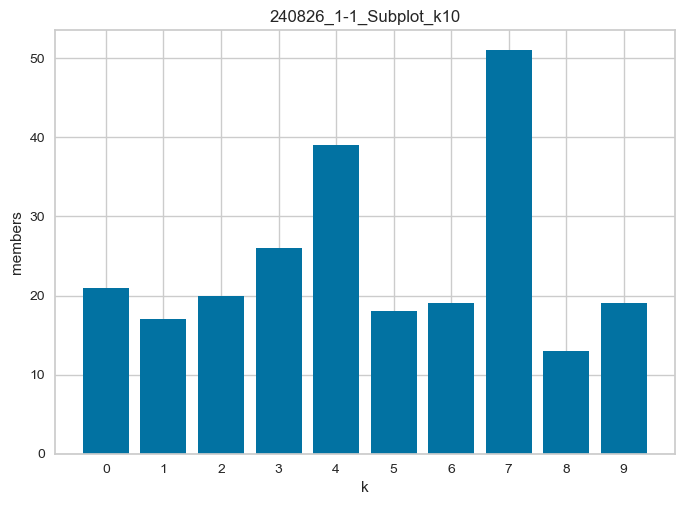

In [218]:
# SUBPLOT of the datapoints according to the clusters

cluster_label = [i for i in range(k)]
cluster_frequency = []

for cluster in cluster_label :
    frequenc = np.count_nonzero(clusters == cluster)
    cluster_frequency.append(frequenc)


# plot this with matplotlib
fig, ax = plt.subplots(1, 1)
ax.bar(cluster_label, cluster_frequency)
ax.set_xticks(cluster_label)

plt.title(f"{date}_{name}_Subplot_k{k}")
plt.xlabel(f"k")
plt.ylabel(f"members")

plt.savefig(f"{date}_{name}_Subplot_k{k}.png")

plt.show()


In [219]:
""" 
using tSNE to visualise the data in a 2D plane
more information here : https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
"""

tsne = TSNE(n_components = 2, verbose = 1, perplexity = 50, n_iter = 10000)
tsne_results = tsne.fit_transform(X_scaled_first)

print(tsne_results[:5])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 243 samples in 0.012s...
[t-SNE] Computed neighbors for 243 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 243 / 243
[t-SNE] Mean sigma: 0.278726
[t-SNE] KL divergence after 250 iterations with early exaggeration: 37.043854
[t-SNE] KL divergence after 10000 iterations: -8.460306
[[-3241.2358 -3697.7585]
 [-4386.103   2675.2368]
 [  668.0816   964.9112]
 [ 1363.2374  4752.084 ]
 [ 3224.1274 -4543.6987]]


In [220]:
"""
- integrate the t-SNE results to the data frame
- export the csv with the t-SNE as a own csv lsit 
"""


brick_data_tsne = bd_delivery_turn_1.copy()

# add results to a pandas table
tsne_x = tsne_results[: , 0]
tsne_y = tsne_results[: , 1]

brick_data_tsne["tsne_x"] = tsne_x
brick_data_tsne["tsne_y"] = tsne_y



# save results to a csv file that can be opened from different applications
#brick_data_tsne.to_csv(f"{date}_{name}_Brick_cluster_TSNE_k{k}.csv")

# display
brick_data_tsne.head(5)

,brick_id,delivery_nr,brick_format,brick_original_dimensions (mm),brick_origin,brick_distance (km),age (y),colour name,turn_nr,mortar rests (%),...,R,G,B,lu (mm),wu (mm),hu (mm),volume (%),colour_clusters,tsne_x,tsne_y
0,1,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,1,0.38,...,229,203,145,161.7,125.4,68.0,0.71,9,-3241.235840,-3697.758545
1,2,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,1,0.36,...,229,197,151,246.2,121.4,67.7,1.04,7,-4386.103027,2675.236816
2,3,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,1,0.37,...,203,183,115,169.9,119.6,65.2,0.68,0,668.081604,964.911194
3,4,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,1,0.05,...,229,192,121,208.3,120.3,68.2,0.88,4,1363.237427,4752.083984
4,5,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,1,0.10,...,151,115,103,256.0,119.2,67.9,1.06,2,3224.127441,-4543.698730


<Axes: title={'center': 'Scatter Plot: x vs y'}, xlabel='x', ylabel='y'>

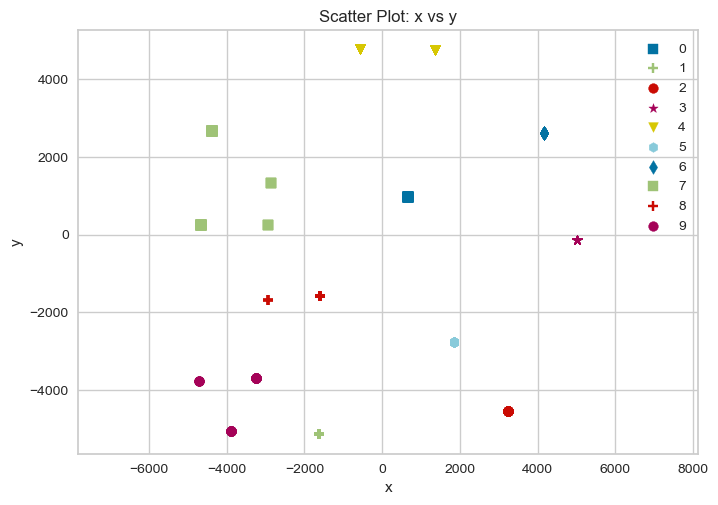

In [221]:
"""
t-SNE scatter plot using Scatter Visualiser
API : https://www.scikit-yb.org/en/latest/api/contrib/scatter.html
"""

classes = [i for i in range(k)] # clusters

# Instantiate the visualiser 
visualiser = ScatterVisualizer(x = "x", y = "y", classes = classes)

visualiser.fit(tsne_results, clusters) # fit data to visualiser
visualiser.transform(tsne_results) # transform the data


visualiser.show(f"{date}_{name}_Scatter_plot_k{k}.png")

In [222]:
""" 
using PCA on the scaled data for dimensional reduction
API : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
"""

pca = PCA()
pca_result = pca.fit_transform(X_scaled_first)

# Calculate variance ratios
explained_variance_ratio = pca.explained_variance_ratio_ # Percentage of variance explained by the components

print(explained_variance_ratio)

[0.84988533 0.09770671 0.05240796]


In [223]:
# perform PCA for only 2PC

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled_first)

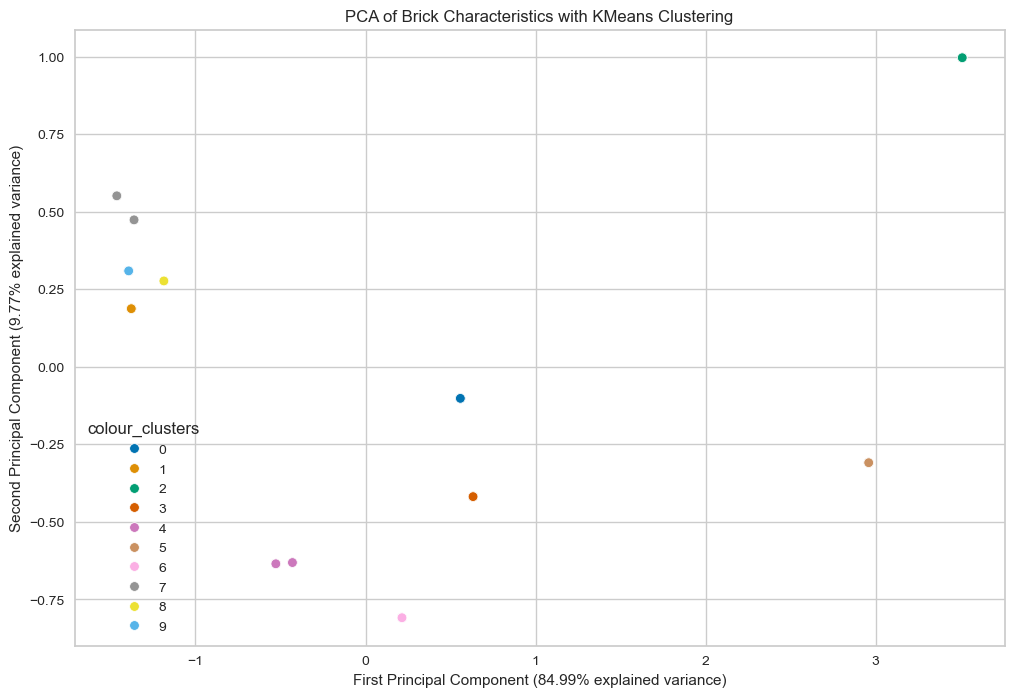

In [224]:
brick_data_pca = bd_delivery_turn_1.copy()


brick_data_pca["PC1"] = pca_result[:, 0]
brick_data_pca["PC2"] = pca_result[:, 1]

# save results to a csv file that can be opened from different applications
#brick_data_pca.to_csv(f"{date}_{name}_Brick_cluster_PCA_k{k}.csv")

plt.figure(figsize=(12, 8))
sns.scatterplot(data=brick_data_pca, x="PC1", y="PC2", hue = "colour_clusters", palette="colorblind", markers = True)

plt.title("PCA of Brick Characteristics with KMeans Clustering")
plt.xlabel(f"First Principal Component ({pca.explained_variance_ratio_[0]:.2%} explained variance)")
plt.ylabel(f"Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} explained variance)")


plt.savefig(f"{date}_{name}_PCA_Plot_k-groups.png")
plt.show()

In [225]:
"""
STEP 2

Turn 1 used to train the k-means model
fit the rest of the delivery to the exisiting model
"""

# select all the remaining bricks of the first delivery
bd_delivery_turn_all = bd_delivery[bd_delivery["turn_nr"] != 1]

# create specific name
name_all = f"{d}-all"
print(name_all)

# Display the top 5 rows as a control function
print(bd_delivery_turn_all.head(5))
print("")
print(f"bricks in the rest of delivery : {len(bd_delivery_turn_all)}")

1-all
     brick_id  delivery_nr  brick_format brick_original_dimensions (mm)  \
243       244            1  Reichsformat                   250, 120, 65   
244       245            1  Reichsformat                   250, 120, 65   
245       246            1  Reichsformat                   250, 120, 65   
246       247            1  Reichsformat                   250, 120, 65   
247       248            1  Reichsformat                   250, 120, 65   

    brick_origin  brick_distance (km)  age (y) colour name  turn_nr  \
243       Erding                   43       79       beige        2   
244       Erding                   43       79       beige        2   
245       Erding                   43       79       beige        2   
246       Erding                   43       79       beige        2   
247       Erding                   43       79       beige        2   

     mortar rests (%)  colour rests (%)    R    G    B  lu (mm)  wu (mm)  \
243              0.31              0.01 

In [226]:
# load the trained scaler model to fit the rest of delivery
scaler = pk.load(open(f"{name}_scaler_colour.pkl","rb"))


X_scaled_all = scaler.transform(bd_delivery_turn_all[numeric_brick_data])

# display the first 5 rows, control function
X_scaled_all[:1]

array([[0.53901324, 1.02536685, 0.81247636]])

In [227]:
# load the trained k-means model to fit the rest of delivery
kmeanModel = pk.load(open(f"{name}_kmeanModel_k{k}.pkl","rb"))
#print(X_scaled[:5])

cluster_center = kmeanModel.cluster_centers_
cluster_labels = kmeanModel.labels_
cluster_iterations = kmeanModel.n_iter_

print(f"cluster centres : {cluster_center}")
#print(f"cluster labels : {cluster_labels}")
print(f"iterations done : {cluster_iterations}")

cluster centres : [[-0.55670287  0.23551882 -0.6690849 ]
 [ 0.53901324  1.02536685  0.81247636]
 [-2.74813509 -2.00238395 -1.32755657]
 [ 0.28615568 -1.01507391 -0.33984906]
 [ 0.53901324  0.60343948 -0.33984906]
 [-1.44170434 -1.80492194 -1.87628296]
 [ 0.53901324 -0.29104654 -0.61421226]
 [ 0.53901324  0.66270787  1.25038154]
 [ 0.53901324  0.5975325   0.92222164]
 [ 0.53901324  0.89372551  0.97709428]]
iterations done : 2


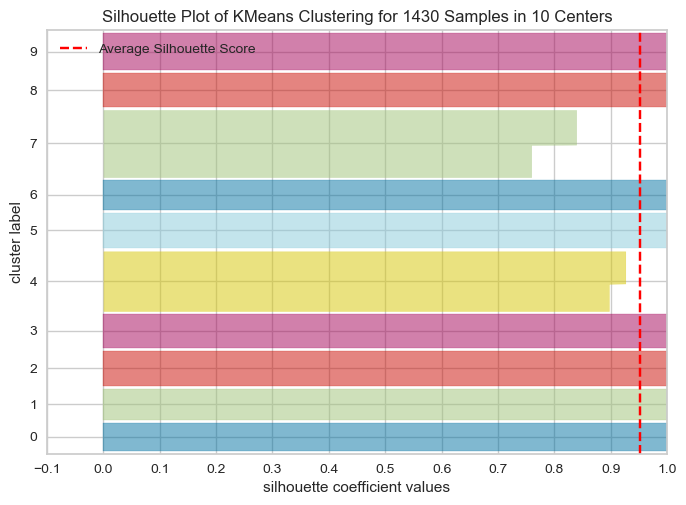

In [228]:
visualizer1 = silhouette_visualizer(kmeanModel, X_scaled_all, colors='yellowbrick', is_fitted=True)      # Fit the data to the visualizer
visualizer1.show(outpath = None) 

#plt.savefig(f"{date}_{name_all}_Silhouette_plot_k{k}.png")
plt.show()

In [229]:
# integrate the clusters to the table 

clusters_all = kmeanModel.predict(X_scaled_all)
bd_delivery_turn_all.loc[:, "colour_clusters"] = clusters_all

print(clusters[:5])

# save the new cluster column to a csv file
#bd_delivery_turn_all.to_csv(f"{date}_{name_all}_Brick_colour-cluster_k{k}.csv")

# display the first 5 of the list
bd_delivery_turn_all.head(5)

[9 7 0 4 2]


C:\Users\david\AppData\Local\Temp\ipykernel_14440\1661382242.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd_delivery_turn_all.loc[:, "colour_clusters"] = clusters_all


,brick_id,delivery_nr,brick_format,brick_original_dimensions (mm),brick_origin,brick_distance (km),age (y),colour name,turn_nr,mortar rests (%),colour rests (%),R,G,B,lu (mm),wu (mm),hu (mm),volume (%),colour_clusters
243,244,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,2,0.31,0.01,229,207,142,257.1,120.0,67.1,1.06,1
244,245,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,2,0.38,0.08,223,145,121,256.5,124.8,67.1,1.10,3
245,246,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,2,0.09,0.08,229,192,121,260.3,116.0,68.0,1.05,4
246,247,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,2,0.40,0.01,229,203,145,260.3,115.4,62.3,0.96,9
247,248,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,2,0.60,0.01,229,197,151,248.9,122.8,62.6,0.98,7
